In [2]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import os
import time
import config

%matplotlib inline

# Dataset

In [3]:
## Imprimindo log
print(f"Informações sobre o Dataset - {config.name} ")
print("-----------------------------------------------------------+++")
print(f"Caminho do dataset: {config.path}")
print(f"{config.audios} arquivos de audio")
print(f"{config.labels} arquivos de rotulo")
print("-----------------------------------------------------------+++")

Informações sobre o Dataset - MusicNet 
-----------------------------------------------------------+++
Caminho do dataset: /run/media/duvrdx/BACKUP/musicnet/
330 arquivos de audio
330 arquivos de rotulo
-----------------------------------------------------------+++


## Labels

In [3]:
labels_cols_str = "" 

# info desnecessária
#labels_extension = os.listdir(labels_path)[0].split(".")[1]
df_test = pd.read_csv(labels_path + "/" + os.listdir(config.labels_path)[0])

# Extraindo string com todas as colunas
for pos, col in enumerate(df_test.columns.values):
    if pos != 0:
        labels_cols_str += f", {col}"
    else:
        labels_cols_str += col

        

## Imprimindo log
print(f"Informações sobre os rotulos")
print("-----------------------------------------------------------+++")
print(f"Caminho: {config.labels_path}")
print(f"Quantidade: {config.labels}")
print(f"Colunas: {config.labels_cols_str}")
print("-----------------------------------------------------------+++")

df_test.head()

Informações sobre os rotulos
-----------------------------------------------------------+++
Caminho: /run/media/duvrdx/BACKUP/musicnet/labels
Quantidade: 330
Colunas: start_time, end_time, instrument, note, start_beat, end_beat, note_value
-----------------------------------------------------------+++


,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,9182,90078,43,53,4.0,1.5,Dotted Quarter
1,9182,33758,42,65,4.0,0.5,Eighth
2,9182,62430,1,69,4.0,1.0,Quarter
3,9182,202206,44,41,4.0,3.5,Whole
4,9182,62430,1,81,4.0,1.0,Quarter


## Audios


In [4]:
audios_id = os.listdir(audios_path)


## Imprimindo log
print(f"Informações sobre os audios")
print("-----------------------------------------------------------+++")
print(f"Caminho: {config.audios_path}")
print(f"Quantidade: {config.audios}")
print("-----------------------------------------------------------+++")

Informações sobre os audios
-----------------------------------------------------------+++
Caminho: /run/media/duvrdx/BACKUP/musicnet/audios
Quantidade: 330
-----------------------------------------------------------+++


# Testes de Performance

## Teste de Leitura

In [5]:
#!pip install wave
import wave

read_tests = {}
audio_quantity = 2
test_quantity = 2

## Rodando o teste n vezes para coletar tempo
for i in range(audio_quantity):
    current_id = audios_id[i][:-4]
    read_tests[current_id] = []
    
    ## Carregando os m primeiros "wav"
    for i in range(test_quantity):
        begin = time.time()
        audio_ , _ = librosa.load(audios_path + "/" + current_id + ".wav")
        final = time.time()
        read_tests[current_id].append((final - begin))

In [6]:
read_tests_median = {item: np.percentile(np.array(read_tests[item]), 50) for item in read_tests.keys()}
read_tests_mean = {item: np.mean(np.array(read_tests[item])) for item in read_tests.keys()}

Text(0.5, 1.0, 'Tempo de Leitura Médio - 2 Testes')

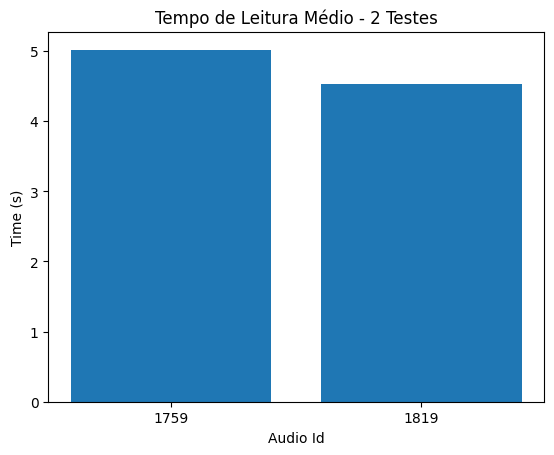

In [7]:
plt.bar(read_tests_mean.keys(), read_tests_mean.values())
plt.ylabel("Time (s)")
plt.xlabel("Audio Id")
plt.title(f"Tempo de Leitura Médio - {test_quantity} Testes")

Text(0.5, 1.0, 'Tempo de Leitura Mediano - 2 Testes')

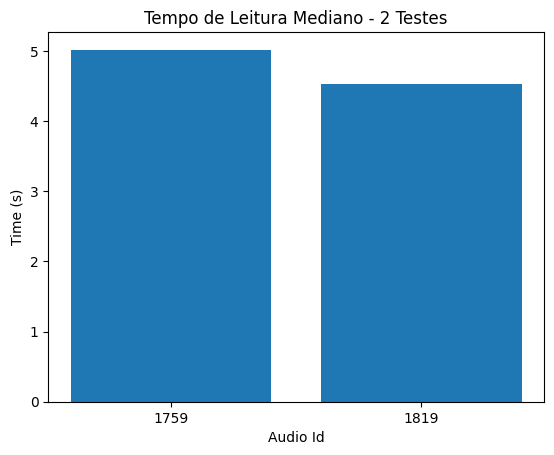

In [8]:
plt.bar(read_tests_median.keys(), read_tests_median.values())
plt.ylabel("Time (s)")
plt.xlabel("Audio Id")
plt.title(f"Tempo de Leitura Mediano - {test_quantity} Testes")

In [9]:
import pickle

In [10]:
read_tests_dump = open("read_tests.pck", "wb") 
pickle.dump(read_tests, read_tests_dump)
read_tests_dump.close()


## Teste de Leitura - .npz


In [11]:
musicnet = np.load('/home/duvrdx/Downloads/musicnet.npz', allow_pickle = True)

In [ ]:
musicnet['1788']

In [ ]:
## Rodando o teste n vezes para coletar tempo
for i in range(audio_quantity):
    current_id = audios_id[i][:-4]
    read_tests[current_id] = []
    
    ## Carregando os m primeiros "wav"
    for i in range(test_quantity):
        begin = time.time()
        print(musicnet[current_id])
        final = time.time()
        read_tests[current_id].append((final - begin))